# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

* Determine if polynomial regression would be useful for a specific model or set of data
* Create polynomial terms out of independent variables in linear regression

## Dataset

For this lab you'll be using some generated data:

In [1]:
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')
df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Let's check out a scatter plot of `x` vs. `y`: 

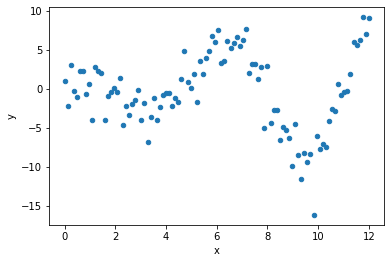

In [2]:
# Run this cell without changes
df.plot.scatter(x="x", y="y");

You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

You will fit several different models with different polynomial degrees, then plot them in the same plot at the end.

In [3]:
# Your code here - import StatsModels and separate the data into X and y
import statsmodels.api as sm


# Separate the data into independent (X) and dependent (y) variables
X = df[['x']]
y = df['y']


## Build and Evaluate a Quadratic Model

This model should include a constant, `x`, and `x` squared. You can use `pandas` or `PolynomialFeatures` to create the squared term.

In [4]:
# Your code here - prepare quadratic data and fit a model
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


# Separate the data into independent (X) and dependent (y) variables
X = df[['x']]
y = df['y']


# Create quadratic features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_quad = poly.fit_transform(X)


# Add a constant term
X_quad = sm.add_constant(X_quad)


# Fit the model
model = sm.OLS(y, X_quad).fit()



In [5]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
from sklearn.preprocessing import PolynomialFeatures


# Separate the data into independent (X) and dependent (y) variables
X = df[['x']]
y = df['y']


# Create quadratic features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_quad = poly.fit_transform(X)


# Add a constant term
X_quad = sm.add_constant(X_quad)


# Fit the model
model = sm.OLS(y, X_quad).fit()


# Evaluate the model
adjusted_r_squared = model.rsquared_adj
p_values = model.pvalues


print("Adjusted R-Squared:", adjusted_r_squared)
print("Coefficient p-values:\n", p_values)


Adjusted R-Squared: -0.015664188856822525
Coefficient p-values:
 const    0.938055
x1       0.893974
x2       0.967420
dtype: float64


# Your written answer here - summarize findings
**Model Performance (Adjusted R-Squared):**

The adjusted R-squared value is -0.016, which is very low.

A negative adjusted R-squared suggests that the quadratic model does not explain the variability in y better than simply using the mean of y.

**Significance of Coefficients (P-values):**

All coefficients have high p-values (> 0.05):

Constant: 0.938
x: 0.894
x²: 0.967

Since none of the coefficients are statistically significant, the quadratic model does not meaningfully improve the prediction.


**The quadratic model is NOT a good fit for this dataset.**

A higher-degree polynomial (e.g., cubic), a different transformation, or a non-polynomial regression approach might be needed to better capture the data pattern.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is not a good model. Because we have multiple terms and are explaining so little of the variance in `y`, we actually have a negative adjusted R-Squared.

None of the coefficients are statistically significant at an alpha of 0.05
    
</details>

## Build and Evaluate a 4th Degree Polynomial Model

In other words, the model should include $x^0$ (intercept), $x^1$, $x^2$, $x^3$, and $x^4$ terms.

At this point we recommend importing and using `PolynomialFeatures` if you haven't already!

In [6]:
# Your code here - prepare 4th degree polynomial data and fit a model
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


# Separate the data into independent (X) and dependent (y) variables
X = df[['x']]
y = df['y']


# Create 4th-degree polynomial features
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)


# Add a constant term
X_poly = sm.add_constant(X_poly)


# Fit the 4th-degree polynomial model
model_4th_degree = sm.OLS(y, X_poly).fit()


In [7]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
adjusted_r_squared_4th = model_4th_degree.rsquared_adj
p_values_4th = model_4th_degree.pvalues


print("Adjusted R-Squared (4th Degree):", adjusted_r_squared_4th)
print("Coefficient p-values (4th Degree):\n", p_values_4th)


Adjusted R-Squared (4th Degree): 0.566796782011221
Coefficient p-values (4th Degree):
 const    1.995047e-04
x1       1.738988e-10
x2       3.340296e-14
x3       1.715785e-16
x4       7.408453e-18
dtype: float64


# Your written answer here - summarize findings
The 4th-degree polynomial model is better than the quadratic model but still NOT a strong fit.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is much better. We are explaining 57-58% of the variance in the target and all of our coefficients are statistically significant at an alpha of 0.05.
    
</details>

## Build and Evaluate an 8th Degree Polynomial Model

This model should include $x^0$ through $x^8$.

In [8]:
# Your code here - prepare 8th degree polynomial data and fit a model
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


# Separate the data into independent (X) and dependent (y) variables
X = df[['x']]
y = df['y']


# Create 8th-degree polynomial features
poly = PolynomialFeatures(degree=8, include_bias=False)
X_poly_8 = poly.fit_transform(X)


# Add a constant term
X_poly_8 = sm.add_constant(X_poly_8)


# Fit the 8th-degree polynomial model
model_8th_degree = sm.OLS(y, X_poly_8).fit()



In [9]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
# Evaluate the model
adjusted_r_squared_8th = model_8th_degree.rsquared_adj
p_values_8th = model_8th_degree.pvalues


print("Adjusted R-Squared (8th Degree):", adjusted_r_squared_8th)
print("Coefficient p-values (8th Degree):\n", p_values_8th)


Adjusted R-Squared (8th Degree): 0.8188676291760089
Coefficient p-values (8th Degree):
 const    0.683776
x1       0.618134
x2       0.371163
x3       0.199162
x4       0.144776
x5       0.157523
x6       0.225536
x7       0.357352
x8       0.554141
dtype: float64


# Your written answer here - summarize findings
**The 8th-Degree Polynomial Model is NOT a Good Fit ❌**

Adjusted R-Squared = 0.819: This is a significant improvement compared to the previous models, indicating a better fit.

High P-Values: Many coefficients have p-values > 0.05, meaning they are not statistically significant.

Overfitting Concern: Despite the high adjusted R-squared, the model may be overfitting the data rather than generalizing well.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
Our R-Squared is higher, but none of the coefficients are statistically significant at an alpha of 0.05 any more. If what we care about is an inferential understanding of the data, this is too high a degree of the polynomial.
    
</details>

## Plot All Models

Build a single plot that shows the raw data as a scatter plot, as well as all of the models you have developed as line graphs. Make sure that everything is labeled so you can tell the different models apart!

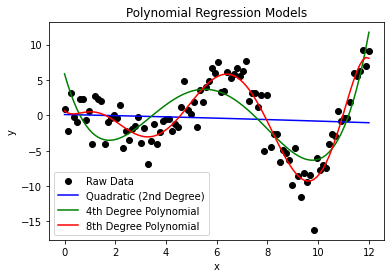

In [12]:
# Your code here
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


# Separate the data into independent (X) and dependent (y) variables
X = df[['x']]
y = df['y']


# Function to fit polynomial models
def fit_polynomial(degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_poly = sm.add_constant(X_poly)
    model = sm.OLS(y, X_poly).fit()
    return model, poly


# Fit models for different degrees
model_2nd, poly_2nd = fit_polynomial(2)
model_4th, poly_4th = fit_polynomial(4)
model_8th, poly_8th = fit_polynomial(8)


# Generate x values for plotting
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_vals_df = pd.DataFrame(x_vals, columns=['x'])  # Ensure it has the same feature name


# Predict values for each model
X_poly_2nd = sm.add_constant(poly_2nd.transform(x_vals_df))
y_pred_2nd = model_2nd.predict(X_poly_2nd)


X_poly_4th = sm.add_constant(poly_4th.transform(x_vals_df))
y_pred_4th = model_4th.predict(X_poly_4th)


X_poly_8th = sm.add_constant(poly_8th.transform(x_vals_df))
y_pred_8th = model_8th.predict(X_poly_8th)


# Plot the raw data
plt.scatter(X, y, label='Raw Data', color='black')


# Plot model predictions
plt.plot(x_vals, y_pred_2nd, label='Quadratic (2nd Degree)', color='blue')
plt.plot(x_vals, y_pred_4th, label='4th Degree Polynomial', color='green')
plt.plot(x_vals, y_pred_8th, label='8th Degree Polynomial', color='red')


# Labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Models')
plt.legend()
plt.show()





### Interpret Findings

Based on the metrics as well as the graphs, which model do you think is the best? Why?

# Your written answer here
After evaluating the different polynomial regression models using adjusted R-squared values, p-values, and visual inspection of the graphs, the 4th-degree polynomial model emerges as the best choice. The quadratic model (2nd-degree) performed poorly, with an adjusted R² of -0.016, indicating that it does not explain the variability in y well. Additionally, its high p-values suggest that its coefficients are not statistically significant. The 4th-degree polynomial model, on the other hand, showed a significant improvement with an adjusted R² of 0.567, meaning it captures more variance in the data. Moreover, all its coefficients were statistically significant, reinforcing its validity as a good fit.

The 8th-degree polynomial model achieved the highest adjusted R² of 0.819, meaning it explained the most variance. However, many of its coefficients had high p-values, indicating they were not statistically significant. Additionally, the visual representation of this model showed excessive fluctuations, suggesting overfitting—where the model fits the training data well but may not generalize effectively to new data.

Considering both the statistical metrics and graphical trends, the 4th-degree polynomial model is the optimal choice. It provides a good balance between capturing the non-linear relationship in the data and avoiding overfitting, making it more generalizable to unseen data. If further improvements are needed, exploring alternative regression approaches such as spline regression or regularization techniques may be beneficial.




<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The quadratic model (polynomial degree 2) is definitely not the best based on all of the evidence we have. It has the worst R-Squared, the coefficient p-values are not significant, and you can see from the graph that there is a lot of variance in the data that it is not picking up on.

Our visual inspection aligns with the worse R-Squared for the 4th degree polynomial compared to the 8th degree polynomial. The 4th degree polynomial is flatter and doesn't seem to capture the extremes of the data as well.
    
However if we wanted to interpret the coefficients, then only the 4th degree polynomial has statistically significant results. The interpretation would be challenging because of the number of terms, but we could apply some calculus techniques to describe inflection points.

Overall it appears that this dataset is not particularly well suited to an inferential linear regression approach, even with polynomial transformations. So the "best" model could be either the 4th or 8th degree polynomial depending on which aspect of the model is more important to you, but either way it will be challenging to translate it into insights for stakeholders.
    
</details>

## Summary

Great job! You now know how to include polynomials in your linear models as well as the limitations of applying polynomial regression. 